In [1]:
import csv
file = open("sf_data_nicole.csv", "r")
data = list(csv.reader(file))
headers = data[0]
#all the fields of the dataset
headers

['',
 'owner_number',
 'business_number',
 'location_number',
 'owner_name',
 'business_name',
 'street_address',
 'city',
 'state',
 'zipcode',
 'latlong',
 'neighborhood',
 'business_start',
 'business_end',
 'location_start',
 'location_end',
 'naics_code',
 'lic_code',
 'parking_tax',
 'transient_occupancy_tax',
 'lat',
 'lon',
 'year_start',
 'year_end',
 'Age']

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('sf_business_cleaned.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#describe
df.describe()

,owner_number,business_number,location_number,zipcode
count,2.245070e+05,224507.000000,224507.000000,224415.000000
mean,7.130417e+05,1.310627,1.086260,94149.809362
std,3.731867e+05,2.374997,1.083861,917.855884
min,2.800000e+01,1.000000,1.000000,0.000000
25%,4.098375e+05,1.000000,1.000000,94107.000000
50%,4.849720e+05,1.000000,1.000000,94114.000000
75%,1.080766e+06,1.000000,1.000000,94123.000000
max,1.208301e+06,98.000000,60.000000,99999.000000


In [4]:
len(df['zipcode'].unique())

1379

In [5]:
#most commonly appear zip code
df['zipcode'].value_counts().idxmax() 

94110.0

In [6]:
#number of businesses located in 94110
df['zipcode'].value_counts().max() 

15306

In [7]:
len(df['neighborhood'].unique())

42

In [8]:
df['neighborhood'].value_counts().idxmax()

'Financial District/South Beach'

In [9]:
df['neighborhood'].describe()

count                             145192
unique                                41
top       Financial District/South Beach
freq                               21179
Name: neighborhood, dtype: object

In [10]:
df['naics_code'].describe()

count                                          135394
unique                                             18
top       Real Estate and Rental and Leasing Services
freq                                            23861
Name: naics_code, dtype: object

In [11]:
from dateutil.relativedelta import relativedelta
from datetime import date
now = date.today()
df["business_end"] = df["business_end"].replace(np.nan,now, regex=True)

In [12]:
df['business_end'] = pd.to_datetime(df['business_end'], format='%Y-%m-%d')
df['business_start'] = pd.to_datetime(df['business_start'], format='%Y-%m-%d')

In [13]:
df["span"] = df['business_end'].dt.year - df['business_start'].dt.year

In [14]:
df["span"].value_counts()

1      20501
2      17660
3      16952
5      15703
4      14290
6      11898
7      10862
8       9749
12      8806
0       8754
9       8118
11      7838
10      6853
13      5620
14      5102
15      4741
16      4105
17      3701
51      3605
18      3107
19      3035
20      2940
21      2687
22      2391
23      2333
24      2051
25      1773
30      1630
27      1501
26      1416
       ...  
115        6
72         6
69         5
71         5
74         4
78         4
128        3
98         3
77         2
124        2
123        2
76         1
149        1
59         1
122        1
170        1
113        1
110        1
103        1
99         1
96         1
95         1
92         1
90         1
89         1
140        1
87         1
83         1
82         1
79         1
Name: span, Length: 100, dtype: int64

In [15]:
df[df["business_end"] != now].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


,owner_number,business_number,location_number,zipcode,span
count,6.065400e+04,60654.000000,60654.000000,60622.000000,60654.000000
mean,6.479707e+05,1.194942,1.074406,94168.252829,7.240710
std,3.382996e+05,1.335937,1.246691,855.970936,9.410112
min,8.600000e+01,1.000000,1.000000,0.000000,0.000000
25%,4.094915e+05,1.000000,1.000000,94107.000000,1.000000
50%,4.725870e+05,1.000000,1.000000,94114.000000,4.000000
75%,1.032444e+06,1.000000,1.000000,94124.000000,10.000000
max,1.208154e+06,55.000000,60.000000,99999.000000,70.000000


# Average time a business span (for closed businesses) is 7.24 years

In [16]:
df["span"].describe()

count    224507.000000
mean         10.931944
std          11.441364
min           0.000000
25%           3.000000
50%           7.000000
75%          14.000000
max         170.000000
Name: span, dtype: float64

In [17]:
df["naics_code"] = df["naics_code"].replace(np.nan, "Not classified", regex=True)
df.groupby(['naics_code'])['span'].describe()

,count,mean,std,min,25%,50%,75%,max
naics_code,,,,,,,,
Accommodations,6523.0,5.597884,9.609089,0.0,1.0,2.0,4.0,52.0
Administrative and Support Services,3281.0,13.964645,15.005973,0.0,3.0,8.0,20.0,73.0
"Arts, Entertainment, and Recreation",6900.0,10.037391,9.561394,0.0,3.0,7.0,15.0,78.0
Certain Services,3982.0,12.332245,12.005770,0.0,4.0,9.0,17.0,110.0
Construction,14727.0,9.315339,9.371726,0.0,2.0,6.0,14.0,51.0
Financial Services,4030.0,11.088586,9.750822,0.0,4.0,8.0,15.0,65.0
Food Services,10685.0,9.432382,9.764258,0.0,3.0,6.0,13.0,55.0
Information,3562.0,8.555025,8.800477,0.0,3.0,6.0,11.0,69.0
Insurance,671.0,13.599106,13.724755,0.0,4.0,9.0,19.0,64.0


In [18]:
df.groupby(['naics_code'])['neighborhood'].describe()

,count,unique,top,freq
naics_code,,,,
Accommodations,5469,39,Mission,532
Administrative and Support Services,2167,38,Financial District/South Beach,610
"Arts, Entertainment, and Recreation",4936,40,Mission,578
Certain Services,2535,39,Financial District/South Beach,369
Construction,4944,41,Sunset/Parkside,676
Financial Services,2829,37,Financial District/South Beach,1385
Food Services,5905,39,Financial District/South Beach,745
Information,2510,39,Financial District/South Beach,932
Insurance,503,33,Financial District/South Beach,220


In [19]:
df.groupby(['parking_tax'])['naics_code'].describe()

,count,unique,top,freq
parking_tax,,,,
False,223406,19,Not classified,88871
True,1101,14,Real Estate and Rental and Leasing Services,430


In [20]:
df.groupby(['transient_occupancy_tax'])['naics_code'].describe()

,count,unique,top,freq
transient_occupancy_tax,,,,
False,219296,19,Not classified,88814
True,5211,19,Accommodations,3845


In [21]:
#closed business that is grouped by industry type with span summary
df[df['business_end'] != now].groupby(['naics_code'])["span"].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


,count,mean,std,min,25%,50%,75%,max
naics_code,,,,,,,,
Accommodations,1589.0,2.419132,6.438180,0.0,0.0,1.0,2.00,52.0
Administrative and Support Services,444.0,6.889640,8.906283,0.0,1.0,3.0,10.25,64.0
"Arts, Entertainment, and Recreation",1079.0,5.702502,6.955831,0.0,1.0,3.0,8.00,47.0
Certain Services,655.0,12.516031,15.423659,0.0,1.0,6.0,15.50,49.0
Construction,2211.0,4.715061,6.878798,0.0,1.0,2.0,6.00,48.0
Financial Services,578.0,7.884083,8.148666,0.0,2.0,6.0,11.00,49.0
Food Services,2041.0,7.410583,8.682017,0.0,1.0,4.0,10.00,50.0
Information,525.0,4.683810,5.279138,0.0,1.0,3.0,6.00,49.0
Insurance,104.0,7.759615,10.460740,0.0,1.0,4.0,9.00,48.0


In [22]:
#currently opened business that is grouped by industry type with span summary
df[df['business_end'] == now].groupby(['naics_code'])["span"].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


,count,mean,std,min,25%,50%,75%,max
naics_code,,,,,,,,
Accommodations,4934.0,6.621605,10.219133,1.0,1.0,3.0,5.0,51.0
Administrative and Support Services,2837.0,15.071907,15.458956,1.0,3.0,9.0,21.0,73.0
"Arts, Entertainment, and Recreation",5821.0,10.840921,9.761034,1.0,3.0,8.0,16.0,78.0
Certain Services,3327.0,12.296063,11.213360,1.0,4.0,9.0,17.0,110.0
Construction,12516.0,10.127996,9.517925,1.0,3.0,7.0,15.0,51.0
Financial Services,3452.0,11.625145,9.894092,1.0,4.0,9.0,16.0,65.0
Food Services,8644.0,9.909764,9.943364,1.0,3.0,6.0,13.0,55.0
Information,3037.0,9.224234,9.109969,1.0,4.0,6.0,12.0,69.0
Insurance,567.0,14.670194,13.987584,1.0,4.0,10.0,20.0,64.0


In [23]:
#closed business that is grouped by neighborhood with span summary
df[df['business_end'] != now].groupby(['naics_code'])["neighborhood"].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


,count,unique,top,freq
naics_code,,,,
Accommodations,1350,37,Mission,130
Administrative and Support Services,293,34,Financial District/South Beach,54
"Arts, Entertainment, and Recreation",779,36,Mission,77
Certain Services,375,37,Financial District/South Beach,47
Construction,554,38,Sunset/Parkside,76
Financial Services,373,30,Financial District/South Beach,217
Food Services,1066,38,Mission,95
Information,362,33,Financial District/South Beach,116
Insurance,75,22,Financial District/South Beach,28


In [24]:
#currently opened business that is grouped by neighborhood with span summary
df[df['business_end'] == now].groupby(['naics_code'])["neighborhood"].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


,count,unique,top,freq
naics_code,,,,
Accommodations,4119,38,Mission,402
Administrative and Support Services,1874,38,Financial District/South Beach,556
"Arts, Entertainment, and Recreation",4157,40,Mission,501
Certain Services,2160,39,Financial District/South Beach,322
Construction,4390,41,Sunset/Parkside,600
Financial Services,2456,37,Financial District/South Beach,1168
Food Services,4839,39,Financial District/South Beach,658
Information,2148,39,Financial District/South Beach,816
Insurance,428,32,Financial District/South Beach,192


In [25]:
import matplotlib.pyplot as plt

In [26]:
dfForVisual = pd.DataFrame(df[['naics_code','span']].groupby(['naics_code']).describe())['span']

In [27]:
dfForVisual

,count,mean,std,min,25%,50%,75%,max
naics_code,,,,,,,,
Accommodations,6523.0,5.597884,9.609089,0.0,1.0,2.0,4.0,52.0
Administrative and Support Services,3281.0,13.964645,15.005973,0.0,3.0,8.0,20.0,73.0
"Arts, Entertainment, and Recreation",6900.0,10.037391,9.561394,0.0,3.0,7.0,15.0,78.0
Certain Services,3982.0,12.332245,12.005770,0.0,4.0,9.0,17.0,110.0
Construction,14727.0,9.315339,9.371726,0.0,2.0,6.0,14.0,51.0
Financial Services,4030.0,11.088586,9.750822,0.0,4.0,8.0,15.0,65.0
Food Services,10685.0,9.432382,9.764258,0.0,3.0,6.0,13.0,55.0
Information,3562.0,8.555025,8.800477,0.0,3.0,6.0,11.0,69.0
Insurance,671.0,13.599106,13.724755,0.0,4.0,9.0,19.0,64.0


In [28]:
#naics_code = index now
dfForVisual['mean']

naics_code
Accommodations                                       5.597884
Administrative and Support Services                 13.964645
Arts, Entertainment, and Recreation                 10.037391
Certain Services                                    12.332245
Construction                                         9.315339
Financial Services                                  11.088586
Food Services                                        9.432382
Information                                          8.555025
Insurance                                           13.599106
Manufacturing                                       12.290811
Multiple                                             7.092805
Not classified                                       9.924815
Private Education and Health Services               12.085310
Professional, Scientific, and Technical Services    10.831309
Real Estate and Rental and Leasing Services         17.832698
Retail Trade                                        12.4762

In [29]:
#plt.pie(dfForVisual['mean'], labels=dfForVisual.index,startangle=90, autopct='%.1f%%')
#plt.title('Ind')
#plt.show()

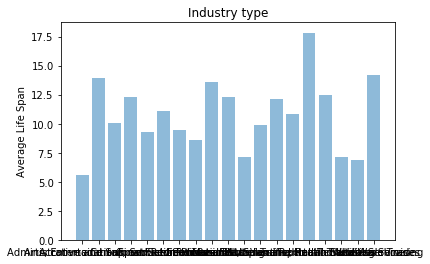

In [30]:
plt.bar(dfForVisual.index, dfForVisual['mean'], align='center', alpha=0.5)
plt.xticks(np.arange(len(dfForVisual.index)), dfForVisual.index)
plt.ylabel('Average Life Span')
plt.title('Industry type')
plt.show()

In [32]:
df

,owner_number,business_number,location_number,owner_name,business_name,street_address,city,state,zipcode,latlong,neighborhood,business_start,business_end,location_start,location_end,naics_code,lic_code,parking_tax,transient_occupancy_tax,span
0,28.0,1,1,Ferrando Louise,3101 Laguna Apts,3101 Laguna St,san francisco,CA,94123.0,"(37.799823, -122.430996)",Marina,1993-09-30,2019-04-13,1993-09-30,NaN,Real Estate and Rental and Leasing Services,NaN,False,False,26
1,52.0,1,1,Ideal Novak Corp,Ideal Novak Corp,8 Mendosa Ave,san francisco,CA,94116.0,"(37.748926, -122.465074)",West of Twin Peaks,1968-10-01,2019-04-13,1968-10-01,NaN,Real Estate and Rental and Leasing Services,NaN,False,False,51
2,71.0,1,1,Tournahu George L,Tournahu Arms,1842 Jefferson St,san francisco,CA,94123.0,"(37.804734, -122.442997)",NaN,1968-10-01,2019-04-13,1968-10-01,2013-12-31,Real Estate and Rental and Leasing Services,NaN,False,False,51
3,71.0,2,1,Tournahu George L,3301 Broderick Apartments,3301 Broderick St,san francisco,CA,94123.0,"(37.800876, -122.444757)",Marina,1968-10-01,2019-04-13,1988-05-01,2013-12-31,Real Estate and Rental and Leasing Services,NaN,False,False,51
4,71.0,3,1,Tournahu George L,1840-42 Jefferson St,1840 Jefferson St #42,san francisco,CA,94123.0,"(37.804759, -122.442794)",NaN,1968-10-01,2019-04-13,1991-10-07,NaN,Real Estate and Rental and Leasing Services,NaN,True,False,51
5,86.0,1,1,Harry D Som Living Trust,1601 Grant Apts,1601 Grant Ave,san francisco,CA,94133.0,"(37.801724, -122.407812)",North Beach,1968-10-01,2016-06-30,1968-10-01,2016-06-30,Not classified,NaN,False,False,48
6,86.0,2,1,Harry D Som Living Trust,1601 Grant Parking,1601 Grant Ave,san francisco,CA,94133.0,"(37.801724, -122.407812)",North Beach,1968-10-01,2016-06-30,2013-01-01,2016-06-30,Not classified,NaN,False,False,48
7,188.0,1,1,Abbett Elec Corp,Abbett Elec Corp,1850 Bryant St,san francisco,CA,94110.0,"(37.76378, -122.410307)",Mission,1968-10-01,2019-04-13,1968-10-01,NaN,Construction,STATION TANKS - ABOVE GROUND,False,False,51
8,189.0,1,1,Tc Mcmechen Inc,Abbey Carpet,2900 Geary Blvd,san francisco,CA,94118.0,"(37.782133, -122.450433)",Presidio Heights,1968-10-01,2019-04-13,2012-07-27,NaN,Retail Trade,NaN,False,False,51
9,189.0,2,1,Tc Mcmechen Inc,Abbey Carpet Of San Francisco,2900 Geary Blvd,san francisco,CA,94118.0,"(37.782133, -122.450433)",Presidio Heights,1968-10-01,2019-04-13,2013-10-01,NaN,Retail Trade,NaN,False,False,51


In [34]:
df['Still_open']=np.where(df.business_end=='2019-04-13',1,0)

In [35]:
sf_df = df[df.city == 'san francisco']

In [36]:
sf_df.to_csv('sf_data_new.csv')

In [81]:
licCount = df[df['business_end'] == '2019-04-13'][df['naics_code'] == 'Food Services'].groupby('lic_code')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [90]:
pd.DataFrame(licCount['Still_open'].describe()).nlargest(10, 'count')

,count,mean,std,min,25%,50%,75%,max
lic_code,,,,,,,,
RESTAURANT 1000 - 2000 SQFT,1184.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
RESTAURANT LESS THAN 1000 SQFT,1130.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
RESTAURANT GREATER THAN 2000 SQFT,398.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
"PLACES OF PUBLIC ASSEMBLY & OPEN-AIR ASSEMBLY, RESTAURANT GREATER THAN 2000 SQFT",299.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
TAKE-OUT ESTABLISHMENT,217.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
"STORAGE & USE OF FLAMMABLE OR COMBUSTIBLE LIQUIDS, MOBILE FOOD FACILITY 5",123.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
CATERER,118.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
CATERER RETAIL FOOD VEHICLES,75.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
STORAGE & USE OF FLAMMABLE OR COMBUSTIBLE LIQUIDS,73.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [94]:
len(df[df["lic_code"] == "RESTAURANT 1000 - 2000 SQFT"][df["business_end"] == now])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1300

In [138]:
busNeighborhood = df[df['business_end'] == '2019-04-13'][df['naics_code'] == 'Food Services'].groupby("lic_code")['neighborhood']
busNeighborhood = busNeighborhood.describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [145]:
busNeighborhood['count'] = busNeighborhood['count'].astype(float)
busNeighborhood

,count,freq,top,unique
lic_code,,,,
AUTO LAUNDRY MECH/PAY-TO-OPERATE WASHING/DYEING,0.0,NaN,NaN,0
BARS/TAVERNS W/FOOD PREP,9.0,2,Financial District/South Beach,8
"BARS/TAVERNS W/FOOD PREP, BILLIARD OR POOL TABLES",1.0,1,Marina,1
"BARS/TAVERNS W/FOOD PREP, LIMITED LIVE PERFORMANCE",0.0,NaN,NaN,0
"BARS/TAVERNS W/FOOD PREP, PLACES OF ENTERTAINMENT",0.0,NaN,NaN,0
BARS/TAVERNS W/O FOOD PREP,43.0,7,Tenderloin,16
"BARS/TAVERNS W/O FOOD PREP, BILLIARD OR POOL TABLES",5.0,1,West of Twin Peaks,5
"BARS/TAVERNS W/O FOOD PREP, EXTENDED HOURS PREMISES, PLACES OF ENTERTAINMENT",1.0,1,South of Market,1
"BARS/TAVERNS W/O FOOD PREP, LIMITED LIVE PERFORMANCE",1.0,1,Nob Hill,1


In [144]:
busNeighborhood.nlargest(10,'count')

,count,freq,top,unique
lic_code,,,,
RESTAURANT LESS THAN 1000 SQFT,691.0,85,Financial District/South Beach,35
RESTAURANT 1000 - 2000 SQFT,664.0,84,Mission,34
RESTAURANT GREATER THAN 2000 SQFT,236.0,37,Financial District/South Beach,32
"PLACES OF PUBLIC ASSEMBLY & OPEN-AIR ASSEMBLY, RESTAURANT GREATER THAN 2000 SQFT",183.0,48,Financial District/South Beach,28
TAKE-OUT ESTABLISHMENT,138.0,30,Financial District/South Beach,29
"STORAGE & USE OF FLAMMABLE OR COMBUSTIBLE LIQUIDS, MOBILE FOOD FACILITY 5",52.0,15,Mission,19
BARS/TAVERNS W/O FOOD PREP,43.0,7,Tenderloin,16
"PLACES OF PUBLIC ASSEMBLY & OPEN-AIR ASSEMBLY, RESTAURANT 1000 - 2000 SQFT",40.0,6,Mission,19
MOBILE FOOD FACILITY 5,31.0,10,Mission,10


In [150]:
busNeighborhood[busNeighborhood.index == "RESTAURANT LESS THAN 1000 SQFT"]

,count,freq,top,unique
lic_code,,,,
RESTAURANT LESS THAN 1000 SQFT,691.0,85,Financial District/South Beach,35


In [154]:
df[df['business_end'] == '2019-04-13'][df['naics_code'] == 'Food Services'][df['neighborhood'] == "Financial District/South Beach"][df["lic_code"] == "RESTAURANT LESS THAN 1000 SQFT"].groupby("lic_code").describe()




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Still_open                                     \
                                    count mean  std  min  25%  50%  75%  max   
lic_code                                                                       
RESTAURANT LESS THAN 1000 SQFT       85.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

                               business_number             ...     span        \
                                         count      mean   ...      75%   max   
lic_code                                                   ...                  
RESTAURANT LESS THAN 1000 SQFT            85.0  1.658824   ...     16.0  35.0   

                               zipcode                                   \
                                 count          mean       std      min   
lic_code                                                                  
RESTAURANT LESS THAN 1000 SQFT    85.0  94105.894118  2.577483  94102.0   

                                                                    
                                    25%      50%      75%      max  
lic_code                                                            
RESTAURANT LESS THAN 1000 SQFT  94104.0  94105.0  94108.0  94111.0  

[1 rows x 48 columns]